In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import os.path as op
import glob
import nibabel as nb
import numpy as np
import pandas as pd
import h5py

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import urllib.request, zipfile
from pycocotools.coco import COCO

from nsda import NSDAccess

%matplotlib inline

/tank/tkn219/software/anaconda3/envs/neuro/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
nsda = NSDAccess('/scratch/2019/visual/nsd/')

#### Get betas
you can read betas of different types and formats for any set of trials from a given session and subject.

In [14]:
# get the betas for a given subject, session and set of trials
betas = nsda.read_betas(subject='subj01', 
                        session_index=1, 
                        trial_index=[], # empty list as index means get all for this session
                        data_type='betas_fithrf_GLMdenoise_RR',
                        data_format='fsaverage')

print(betas.shape)

(327684, 750)


#### Behavior
You can, in a similar way, get the behavioral output for a given set of trials

In [10]:
beh = nsda.read_behavior(subject='subj01', 
                         session_index=1, 
                         trial_index=np.arange(0,200,2))

beh.head()

,SUBJECT,SESSION,RUN,TRIAL,73KID,10KID,TIME,ISOLD,ISCORRECT,RT,CHANGEMIND,MEMORYRECENT,MEMORYFIRST,ISOLDCURRENT,ISCORRECTCURRENT,TOTAL1,TOTAL2,BUTTON,MISSINGDATA
0,1,1,1,1,46003,626,0.505082,0,1.0,803.529781,0.0,NaN,NaN,0,1.0,1,0,1.0,0
2,1,1,1,3,829,4850,0.505175,0,1.0,742.351236,0.0,NaN,NaN,0,1.0,1,0,1.0,0
4,1,1,1,5,16021,9538,0.505267,0,1.0,547.422774,0.0,NaN,NaN,0,1.0,1,0,1.0,0
6,1,1,1,7,51518,4421,0.505360,0,1.0,524.694784,0.0,NaN,NaN,0,1.0,1,0,1.0,0
8,1,1,1,9,50611,8124,0.505452,0,1.0,577.386738,0.0,NaN,NaN,0,1.0,1,0,1.0,0


In [13]:
# Also, the stimuli
nsda.stim_descriptions.head()

,cocoId,cocoSplit,cropBox,loss,nsdId,flagged,BOLD5000,shared1000,subject1,subject2,...,subject5_rep2,subject6_rep0,subject6_rep1,subject6_rep2,subject7_rep0,subject7_rep1,subject7_rep2,subject8_rep0,subject8_rep1,subject8_rep2
0,532481,val2017,"(0, 0, 0.1671875, 0.1671875)",0.100000,0,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
1,245764,val2017,"(0, 0, 0.125, 0.125)",0.000000,1,False,False,False,0,0,...,0,0,0,0,13985,14176,28603,0,0,0
2,385029,val2017,"(0, 0, 0.125, 0.125)",0.000000,2,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,311303,val2017,"(0, 0, 0.16640625, 0.16640625)",0.125000,3,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
4,393226,val2017,"(0, 0, 0.125, 0.125)",0.133333,4,False,False,False,0,0,...,0,13720,22861,23023,0,0,0,0,0,0


#### Get pictures
Pictures from the hdf5 file

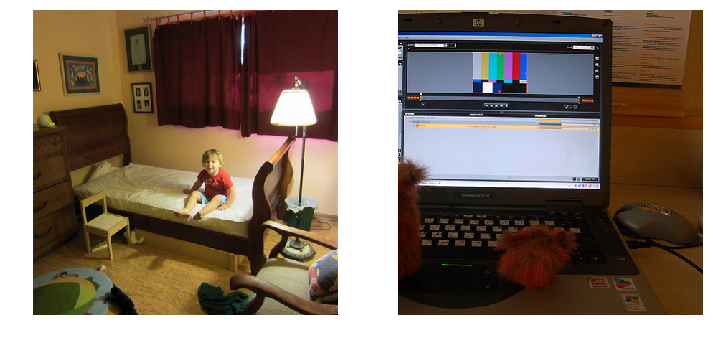

In [11]:
imgs = nsda.read_images([569, 575], show=True)

#### Get annotation info
you can also get different types of annotation info. Notice that the cropping for the fMRI experiment has shifted the annotations somewhat, this needs to be fixed

getting annotations from /scratch/2019/visual/nsd/nsddata_stimuli/stimuli/nsd/annotations/captions_val2017.json
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
A young boy sitting on a bed in a bedroom.
a young boy sitting on a bed with a lamp on beside it
a kid is sitting on a small bed in a room
A little boy sits on a bed with a chair next to it.
The child is waiting for his parents to come in.
getting annotations from /scratch/2019/visual/nsd/nsddata_stimuli/stimuli/nsd/annotations/person_keypoints_val2017.json
loading annotations into memory...
Done (t=0.22s)
creating index...
index created!


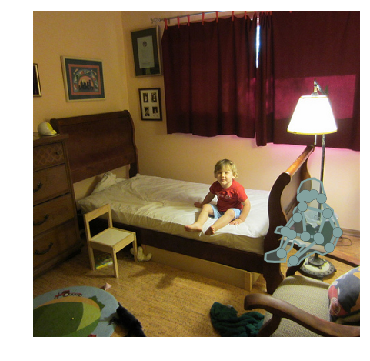

In [12]:
ci = nsda.read_image_coco_info(569, info_type='captions', show_annot=True)
pi = nsda.read_image_coco_info(569, info_type='person_keypoints', show_annot=True, show_img=True)